# Uber Data Analysis

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## Load data into memory

In [2]:
data = pd.read_csv('C:\\Users\\knataraj\\Desktop\\ML\\uber-raw-data-apr14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


## Convert date and time to useful column

In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [7]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)



In [8]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

## Analyze the DoM

''

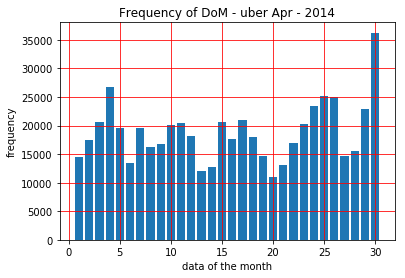

In [9]:
plt.hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('data of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM - uber Apr - 2014')
plt.grid(color='r')
;

In [10]:
#for k, rows in data.groupby('dom'):
#    print((k,len(rows)))
def count_rows(row):
    return len(row)

dt_data = data.groupby('dom').apply(count_rows)
dt_data

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

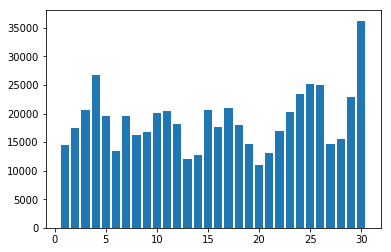

In [12]:
plt.bar(range(1,31), dt_data)

In [13]:
by_date_sorted = dt_data.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

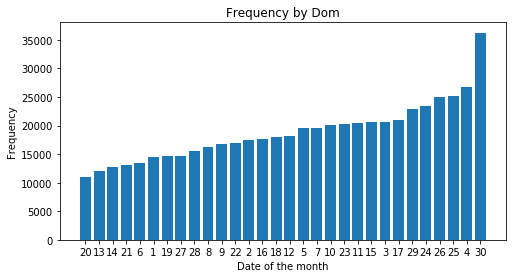

In [14]:
#bar(range(1,31), by_date_sorted)
plt.figure(figsize=(8,4))
plt.bar(range(1,31), by_date_sorted)
plt.xticks(range(1,31), by_date_sorted.index)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by Dom')
;

## Analysis by hour

''

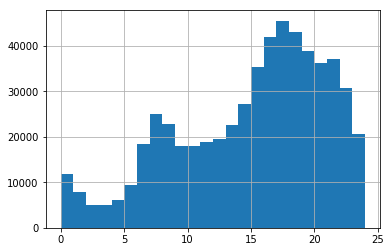

In [15]:
plt.hist(data.hour, bins = 24, range=(0, 24))
plt.grid()
;

## Analyse by weekday

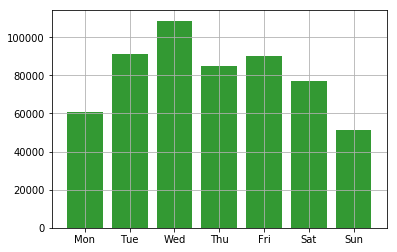

In [16]:
plt.hist(data.weekday, bins=7, range=(-0.5,6.5), rwidth = 0.8, color='g', alpha=.8)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.grid()

## Cross analysis (hour and dow)

In [17]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


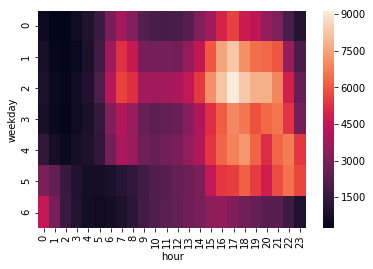

In [18]:
sn.heatmap(by_cross)


## By Latittude and Longitude

''

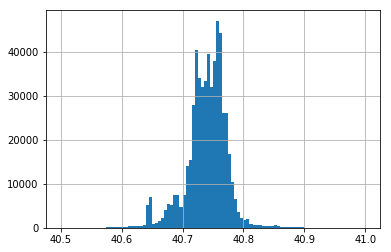

In [19]:
plt.hist(data['Lat'], bins = 100, range = (40.5, 41))
plt.grid()
;

''

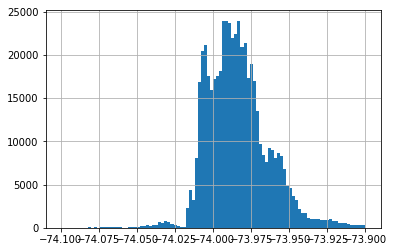

In [20]:
plt.hist(data['Lon'], bins = 100, range=(-74.1, -73.9))
plt.grid()
;

''

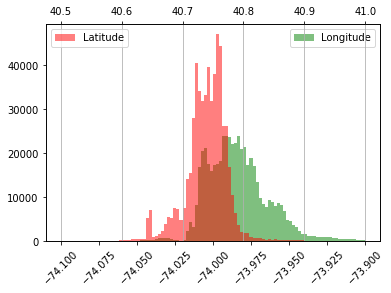

In [21]:
plt.hist(data['Lon'], bins=100, range=(-74.1, -73.9), color = 'g', alpha = .5, label = 'Longitude')
plt.xticks(rotation = 45)
plt.legend()
plt.twiny()

plt.hist(data['Lat'], bins=100, range=(40.5, 41), color = 'r', alpha = .5, label = 'Latitude')
plt.legend(loc=2)
plt.grid()

;

(-74.2, -73.7)

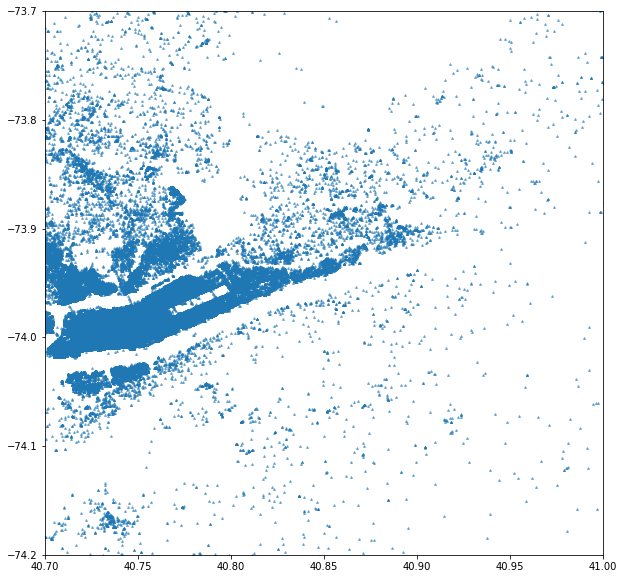

In [22]:
plt.figure(figsize=(10,10))
plt.plot(data['Lat'], data['Lon'], '^', ms=2, alpha=.5)
plt.xlim(40.7, 41)
plt.ylim(-74.2, -73.7)
